# Complex numbers

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np

What is $i$?
The common assumption is that $i=\sqrt{-1}$, but this is not actually the way it is ever defined. In fact, the value of $i$ is never defined mathematically.

The true definition comes is:
$$i^2=-1.$$

It allows us to take the square root of negative numbers, which give rise to so called imaginary numbers (named as a mockery originally but nevertheless stuck).

Complex numbers are the sum of a real number and an imaginary number.
$$z = a + i b$$
where $a$ and $b$ are both real numbers.

The operation of selecting the real or imaginary portions of a complex number are usually expressed as:

$$
a = Re(z), \hspace{10pt} b = Im(z)
$$

Where real numbers exist along a number line, complex numbers are said to exist along a plane. They are plotted on this plane like an (x, y) pair is plotted on the standard coordinate axis.

In [78]:
# this is just some plotting utilities.
def plot_imag(zs, vector=False, angle=False, labels=None):
    if not isinstance(zs, list):
        zs = [zs]
    if labels is None:
        labels = [None] * len(zs)
        label_it = False
    else:
        label_it = True
    for z, label in zip(zs, labels):
        plt.scatter(z.real, z.imag, label=label)
    if angle:
        vector=True
        phi = np.angle(z, deg=True)
        r = np.abs(z)
        offset = 0.35 * r
        arc = Arc([0, 0], offset, offset, angle=0, theta1=0, theta2=phi)
        ax = plt.gca()
        ax.add_patch(arc)
    
    if vector:
        for i, z in enumerate(zs):
            plt.plot([0, z.real], [0, z.imag], color=f'C{i}')

    if label_it:
        plt.legend()
        
    plt.xlabel('real')
    plt.ylabel('imag')
    plt.axis('square')
    plt.xlim([-6, 6])
    plt.ylim([-6, 6])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.grid()

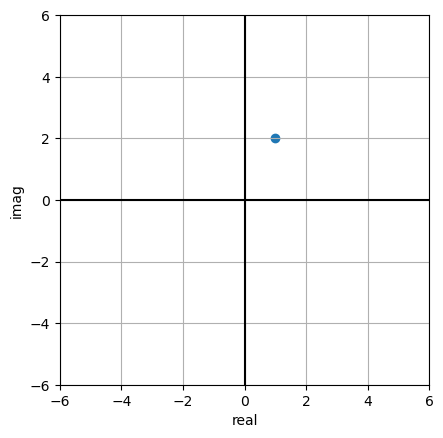

In [79]:
z = 1 + 2j  # in python j is the imaginary number

plot_imag(z)

When you add complex numbers together, there individual components add together (similar to adding vectors).

\begin{align}
z_1 &= a_1 + i b_1\\
z_2 &= a_2 + i b_2\\
z_1 + z_2 &= (a_1 + a_2) + i(b_1 + b_2)
\end{align}

When you multiply them together FOIL it!
\begin{align}
z_1 z_2 &= (a_1 + i b_1) (a_2 + i b_2)\\
&= a_1 a_2 + i a_1 b_2 + i a_2 b_1 + i^2 b_1 b_2\\
&= (a_1 a_2 - b_1 b_2) + i(a_1 b_2 + a_2 b_1)
\end{align}

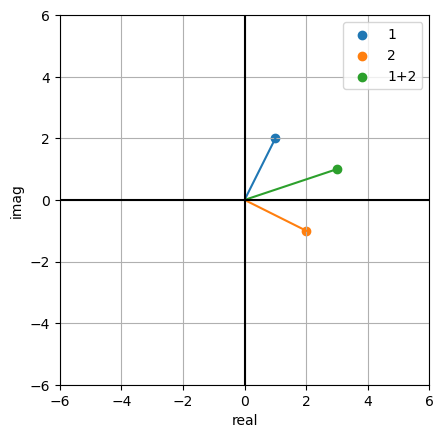

In [80]:
z1 = 1 + 2j
z2 = 2 - 1j

plot_imag([z1, z2, z1 + z2], labels=[1, 2, '1+2'], vector=True)

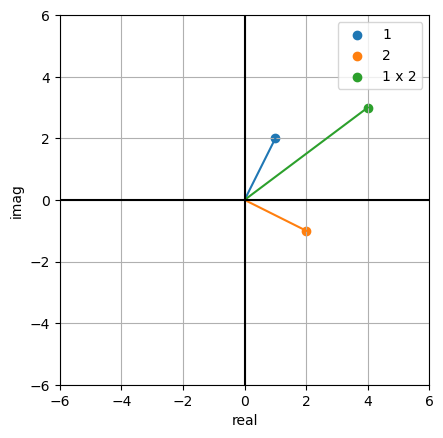

In [81]:
plot_imag([z1, z2, z1 * z2], labels=[1, 2, '1 x 2'], vector=True)

What does multiplying by a complex number actually do?

- It both rotates and scales the number.

Above, for $z_1 z_2 = z_3$ the angle between $z_1$ and $z_3$ is the same as the angle between the real axis and $z_2$.

# Polar representation
We can also represent complex numbers with polar coordinates:

They have an angle (called phase) and a magnitude:

\begin{align}
r &= \sqrt{a^2 + b^2}\\
\theta &= \arctan(b, a)
\end{align}

Phase $\theta$ is the counterclockwise angle with the real axis, and $r$ is the radial distance from the origin (a positive number)

To go from the polar representation to the cartesian representation:
\begin{align}
a &= r \cos \theta\\
b &= r \sin \theta
\end{align}

## Euler's Identity

Euler's Identity states:

$$
e^{i\theta} = \cos\theta + i \sin\theta
$$

This allows us to represent a complex number in terms of its magnitude and phase as:
$$
z = r e^{i\theta} = a + i b
$$

Let's look again at multiplying complex numbers:
$$
z_1 z_2 = (r_1 e^{i\theta_1}) (r_2 e^{i\theta_2}) = r_1 r_2 e^{i(\theta_1 + \theta_2)}
$$
It should be very clear that this is a rotation.

Q? What does multiply a complex number by $i$ do?

What is the magnitude and phase of $i$? $r=1$, $\theta=\pi/2$

Multiplication by $i$ rotates a number 90 degrees counterclockwise on the complex plane!
Conversely, dividing by $i$ rotates a number 90 degrees clockwise!

Should be clear then how we get that:
\begin{align}
...\\
i^{-1} = -i\\
i^0 = 1\\
i^1 = i\\
i^2 = -1\\
i^3 = -i\\
i^4 = 1\\
...
\end{align}

In [82]:
(1j)**3 == 1/(1j)

True

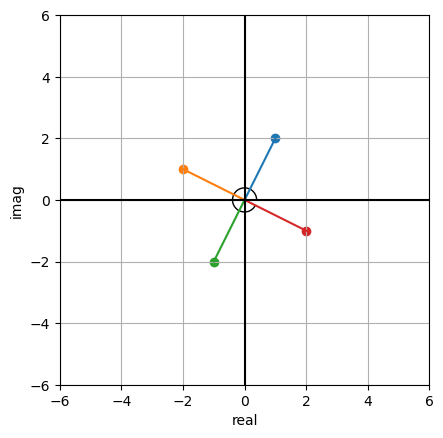

In [83]:
plot_imag([z1, z1 * 1j, z1 * 1j * 1j, z1 * 1j * 1j * 1j], angle=True)

The conjugate of a complex number ($z^*$) is:
$$ z= a + bi$$
$$z^* = a - bi$$

Basically, a reflection over the real axis.

It is also a negation of the phase:

\begin{align}
z = r e^{i\phi}\\
z^* = r e^{-i\phi}
\end{align}

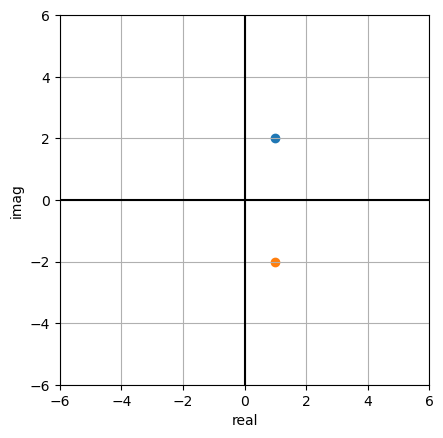

In [84]:
plot_imag([z1, z1.conjugate()])

Q? What is $zz^*$?

\begin{align}
zz^* &= (r e^{i\theta})(r e^{-i\theta})\\
&= r^2 e^{i (\theta - \theta)}\\
&= r^2
&= |z|^2
\end{align}

a number multiplied by it's complex conjugate will always be real.

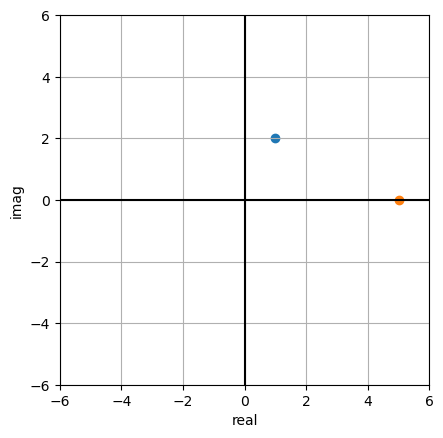

In [85]:
plot_imag([z1, z1 * z1.conjugate()])

As a note, you can also derive many of the cosine and sine identities using Euler's formula including:
- Double angle formulas
- addition of angle formulas
- multiplication of angle formulas

by noting that 

$$
\cos\theta = \frac{e^{i\theta} + e^{-i\theta}}{2}
$$
$$
\sin\theta = \frac{e^{i\theta} - e^{-i\theta}}{2i}
$$